# Critères de Séparation

Comme vu dans la précédente partie, l'algorithme Decision Tree CART construit un arbre permettant de classifier des éléments. Nous explorons dans cette partie le fonctionnement interne de cet algorithme.

Pour créer les seuils des nœuds, on itère sur chacune des features et on cherche l'élément dont la valeur de l'attribut séparerait le mieux le dataset.

Sauf que pour pouvoir comparer et déterminer le meilleur seuil, il nous faut des critères (_criterion_ en anglais). Nous avons essayé deux critères de pureté : _gini_ et _log loss_. Voyons comment ils réagissent sur des exemples concrets.

[Retour au sommaire](../README.md#table-des-matières)

## Chargement des données et prétraitement

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import sklearn.tree as tree

if os.getcwd().endswith("docs"):
    sys.path.append(os.path.join(os.getcwd(), ".."))

from ias import DecisionTree, PCA, split_dataset
from ias.Datasets import Emnist, Iris
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

In [2]:
iris_train_x, iris_train_y, iris_test_x, iris_test_y = split_dataset(0.6, Iris)

In [3]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

pca = PCA(0.90)
pca.fit(emnist_train_x)

emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

## Comparaison sur Iris

In [4]:
# arbre avec critère Gini
iris_tree_gini = DecisionTree(max_depth=4, splitter="best", criterion_name="gini")
iris_tree_gini.fit(iris_train_x, iris_train_y)
iris_pred_gini = iris_tree_gini.predict(iris_test_x)

In [5]:
# arbre avec critère Log-loss
iris_tree_log_loss = DecisionTree(max_depth=4, splitter="best", criterion_name="log_loss")
iris_tree_log_loss.fit(iris_train_x, iris_train_y)
iris_pred_log_loss = iris_tree_log_loss.predict(iris_test_x)

In [6]:
# version sklearn
iris_tree_sklearn_gini = tree.DecisionTreeClassifier(max_depth=4, criterion="gini")
iris_tree_sklearn_gini = iris_tree_sklearn_gini.fit(iris_train_x, iris_train_y)
iris_pred_sklearn_gini = iris_tree_sklearn_gini.predict(iris_test_x)

iris_tree_sklearn_log_loss = tree.DecisionTreeClassifier(max_depth=4, criterion="log_loss")
iris_tree_sklearn_log_loss = iris_tree_sklearn_log_loss.fit(iris_train_x, iris_train_y)
iris_pred_sklearn_log_loss = iris_tree_sklearn_log_loss.predict(iris_test_x)

Accuracy score gini (homemade) : 0.950
Accuracy score sklearn gini : 0.950


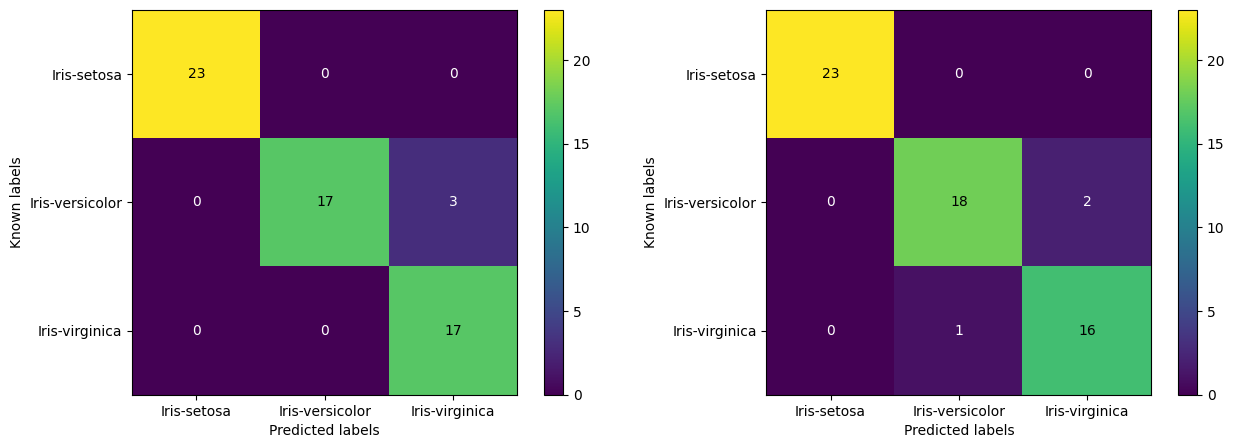

In [7]:
# comparons les matrices de confusions pour Gini
iris_c_matrix_gini = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_gini)
iris_c_matrix_gini_sklearn = confusion_matrix(Iris.class_number, iris_test_y,
                                              iris_pred_sklearn_gini)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(iris_c_matrix_gini, Iris.class_names, ax=ax1)
show_confusion_matrix(iris_c_matrix_gini_sklearn, Iris.class_names, ax=ax2)

print(f"Accuracy score gini (homemade) : {accuracy_score(iris_test_y, iris_pred_gini):.3f}")
print(f"Accuracy score sklearn gini : {accuracy_score(iris_test_y, iris_pred_sklearn_gini):.3f}")

Accuracy score log_loss (homemade) : 0.967
Accuracy score sklearn log_loss : 0.967


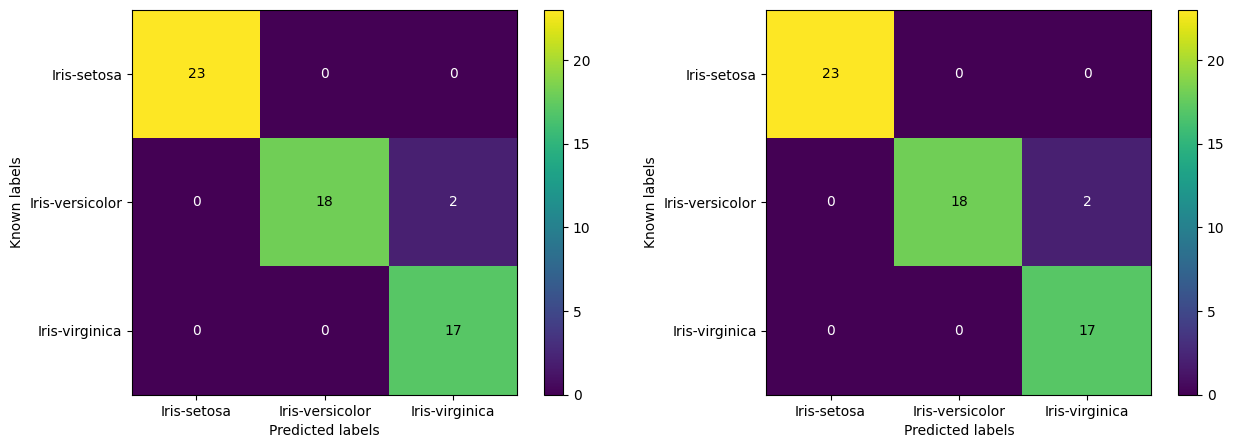

In [8]:
# comparons les matrices de confusions pour Log-Loss
iris_c_matrix_log_loss = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_log_loss)
iris_c_matrix_log_loss_sklearn = confusion_matrix(Iris.class_number, iris_test_y,
                                                  iris_pred_sklearn_log_loss)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(iris_c_matrix_log_loss, Iris.class_names, ax=ax1)
show_confusion_matrix(iris_c_matrix_log_loss_sklearn, Iris.class_names, ax=ax2)

print(f"Accuracy score log_loss (homemade) : {accuracy_score(iris_test_y, iris_pred_log_loss):.3f}")
print(
    f"Accuracy score sklearn log_loss : {accuracy_score(iris_test_y, iris_pred_sklearn_log_loss):.3f}")

### Conclusions

Nos versions du Decision Tree, sur ce petit dataset obtiennent exactement les mêmes résultats que sklearn.
On observe que le critère `gini` semble légèrement meilleur que `log Loss`. Vérifions sur EMNIST !

## Comparaison sur EMNIST

In [9]:
# arbre avec critère Gini
emnist_tree_gini = DecisionTree(max_depth=8, splitter="best", criterion_name="gini")
emnist_tree_gini.fit(emnist_compressed_train_x, emnist_train_y)
emnist_pred_gini = emnist_tree_gini.predict(emnist_compressed_test_x)

In [10]:
# arbre avec critère Log-loss
emnist_tree_log_loss = DecisionTree(max_depth=8, splitter="best", criterion_name="log_loss")
emnist_tree_log_loss.fit(emnist_compressed_train_x, emnist_train_y)
emnist_pred_log_loss = emnist_tree_log_loss.predict(emnist_compressed_test_x)

In [11]:
# version sklearn
emnist_tree_sklearn_gini = tree.DecisionTreeClassifier(max_depth=8, criterion="gini")
emnist_tree_sklearn_gini = emnist_tree_sklearn_gini.fit(emnist_compressed_train_x, emnist_train_y)
emnist_pred_sklearn_gini = emnist_tree_sklearn_gini.predict(emnist_compressed_test_x)

emnist_tree_sklearn_log_loss = tree.DecisionTreeClassifier(max_depth=8, criterion="log_loss")
emnist_tree_sklearn_log_loss = emnist_tree_sklearn_log_loss.fit(emnist_compressed_train_x, emnist_train_y)
emnist_pred_sklearn_log_loss = emnist_tree_sklearn_log_loss.predict(emnist_compressed_test_x)

Accuracy score gini (homemade) : 0.617
Accuracy score sklearn gini : 0.633


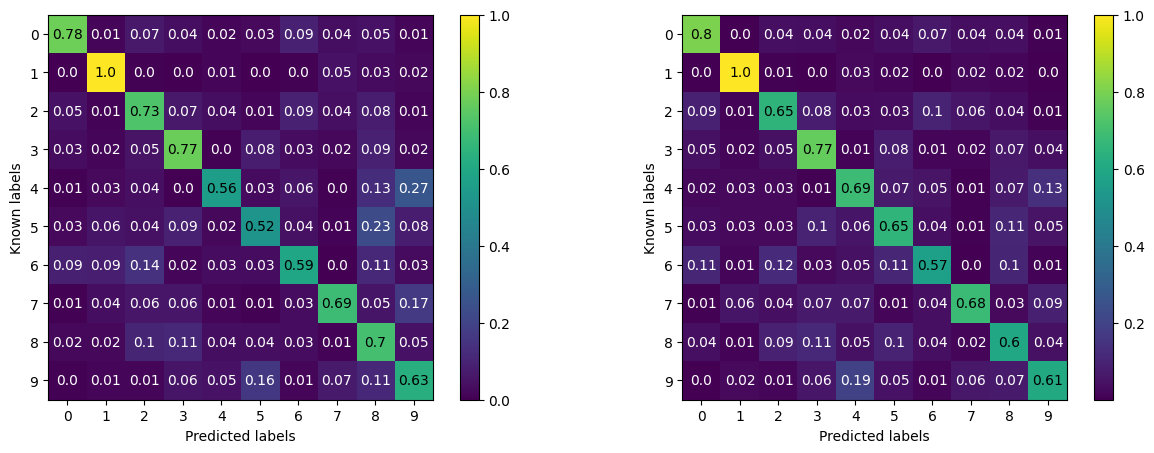

In [12]:
# comparons les matrices de confusions pour Gini
emnist_c_matrix_gini = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred_gini)
emnist_c_matrix_gini_sklearn = confusion_matrix(Emnist.class_number, emnist_test_y,
                                                emnist_pred_sklearn_gini)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(emnist_c_matrix_gini, Emnist.class_names, ax=ax1, round_decimal=2)
show_confusion_matrix(emnist_c_matrix_gini_sklearn, Emnist.class_names, ax=ax2, round_decimal=2)

print(f"Accuracy score gini (homemade) : {accuracy_score(emnist_test_y, emnist_pred_gini):.3f}")
print(
    f"Accuracy score sklearn gini : {accuracy_score(emnist_test_y, emnist_pred_sklearn_gini):.3f}")

Accuracy score log_loss (homemade) : 0.611
Accuracy score sklearn log_loss : 0.627


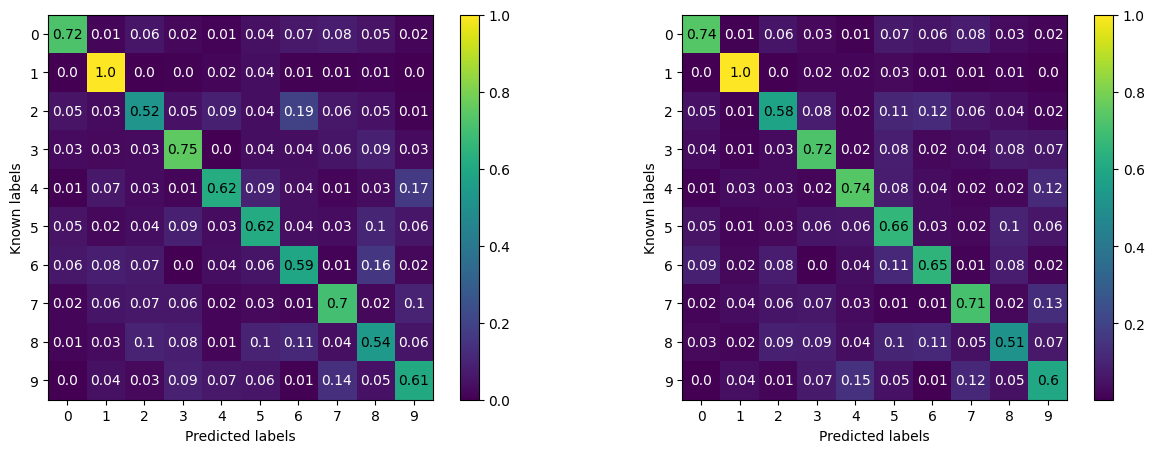

In [13]:
# comparons les matrices de confusions pour Log-Loss
emnist_c_matrix_log_loss = confusion_matrix(Emnist.class_number, emnist_test_y,
                                            emnist_pred_log_loss)
emnist_c_matrix_log_loss_sklearn = confusion_matrix(Emnist.class_number, emnist_test_y,
                                                    emnist_pred_sklearn_log_loss)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(emnist_c_matrix_log_loss, Emnist.class_names, ax=ax1, round_decimal=2)
show_confusion_matrix(emnist_c_matrix_log_loss_sklearn, Emnist.class_names, ax=ax2, round_decimal=2)

print(
    f"Accuracy score log_loss (homemade) : {accuracy_score(emnist_test_y, emnist_pred_log_loss):.3f}")
print(
    f"Accuracy score sklearn log_loss : {accuracy_score(emnist_test_y, emnist_pred_sklearn_log_loss):.3f}")

### Conclusions

On observe déjà que les versions sklearn s'effectuent bien plus rapidement.
Sur un dataset plus complexe comme EMNIST, l'efficacité du Decision Tree s'effondre.
Le critère n'a pas beaucoup d'influence ici. Par contre, notre algo reste assez proche de celui de sklearn en termes de d'efficacité de la classification.

[Retour au sommaire](../README.md#table-des-matières)